### Text Analysis
    Find out the most frequently used words, bigramd , and trigrams 

In [1]:

import numpy as np
import pandas as pd
import re
import string
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
# from google.colab import files  # this code is for when using colab
# uploaded = files.upload()

In [2]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['combine_25.csv']))
df = pd.read_csv('combine_25.csv')

In [3]:
df.shape

(2000, 12)

In [4]:
df.head()

,Unnamed: 0,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,0,Parenting,u35fhw,We recently found a drop in daycare for my 3yr...,Daycare recommends shorter drop offs.,0.0,1649898505,fromsubmission,fromsubmission,fromsubmission,fromsubmission,We recently found a drop in daycare for my 3yr...
1,1,Parenting,u355wz,So I've lurked on this sub for a long time as ...,Looking for advice for taking the leap to beco...,0.0,1649897684,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So I've lurked on this sub for a long time as ...
2,2,Parenting,u34x24,So my 20yr old son came back to live with me a...,lazy teenager,0.0,1649896924,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So my 20yr old son came back to live with me a...
3,3,Parenting,u34vh5,"I feel bad about posting, since I had all the ...",I still haven't bonded with my 1 year old,0.0,1649896790,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I feel bad about posting, since I had all the ..."
4,4,Parenting,u34sai,My Steam library is looking a bit thin when it...,PC game advice for a 5 year old.,0.0,1649896511,fromsubmission,fromsubmission,fromsubmission,fromsubmission,My Steam library is looking a bit thin when it...


In [5]:
df.isnull().sum()

Unnamed: 0      0
subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

In [44]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS
,
add_stop_words = ['fromcomments','posts','human','compose','10','webp','ncsu','crap','pray', 'survey', 'png','www','x200b', 'reddit', 'nih', 'gov','qualtrics', 'sure','new', 'redd', 'fromsubmission','amp','https', 'removed','having','really','said','does', 'https','com','things','went','did', 'didn','just' ,'like','doe','ll', 'way','good','don','know','time', 'doesn','think','told', 'thanks','getting','ve' ,'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# stop_words

In [7]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(1, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [8]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['able', 'advice', 'age', 'ask', 'asked', 'away', 'baby', 'bad', 'bed', 'best', 'better', 'bit', 'care', 'child', 'children', 'come', 'dad', 'daughter', 'day', 'days', 'doing', 'eat', 'end', 'family', 'father', 'feel', 'fine', 'food', 'friend', 'friends', 'gets', 'great', 'hard', 'help', 'home', 'house', 'husband', 'kid', 'kids', 'leave', 'let', 'life', 'little', 'long', 'looking', 'lot', 'love', 'make', 'making', 'maybe', 'mom', 'month', 'months', 'mother', 'need', 'needs', 'night', 'normal', 'old', 'older', 'parent', 'parenting', 'parents', 'people', 'play', 'point', 'pretty', 'right', 'room', 'say', 'saying', 'says', 'school', 'sleep', 'son', 'start', 'started', 'stop', 'talk', 'talking', 'tell', 'thing', 'thought', 'times', 'today', 'toddler', 'tried', 'try', 'trying', 'use', 'want', 'wanted', 'wants', 'week', 'wife', 'won', 'work', 'year', 'year old', 'years']


In [9]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(25)

kids        705
old         650
son         611
want        575
child       569
year        515
daughter    487
baby        450
feel        431
parents     417
help        405
kid         389
make        377
need        358
day         354
school      333
year old    332
work        319
home        316
say         300
mom         295
husband     276
little      274
doing       271
family      254
dtype: int64

In [10]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,kids,old,son,want,child,year,daughter,baby,feel,parents,...,school,year old,work,home,say,mom,husband,little,doing,family
Count,705,650,611,575,569,515,487,450,431,417,...,333,332,319,316,300,295,276,274,271,254


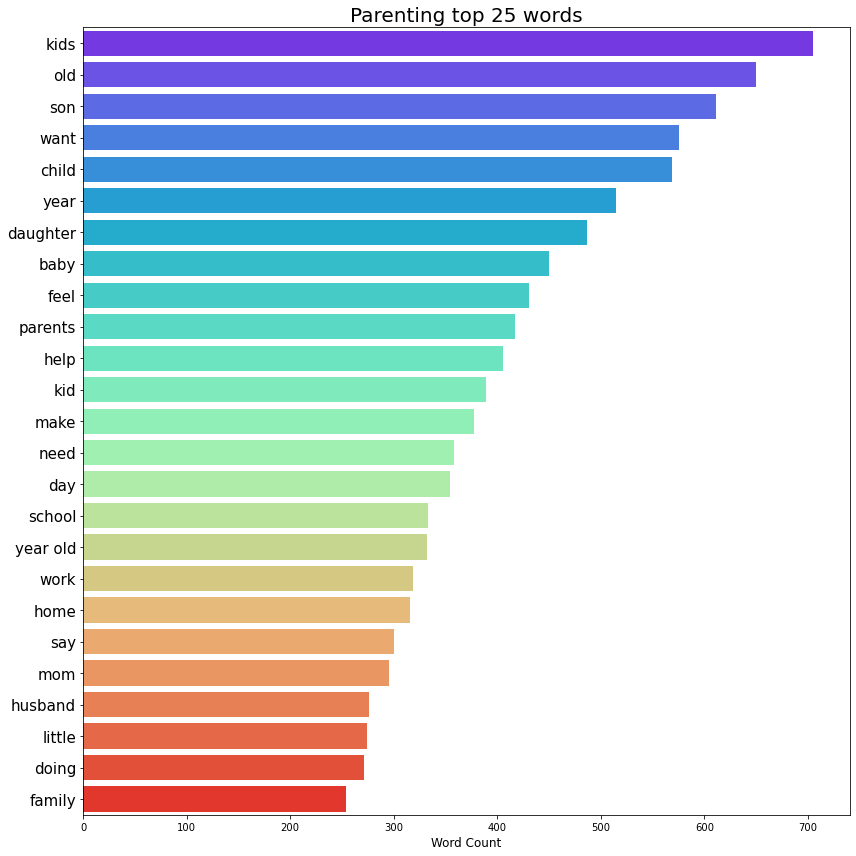

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

In [13]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(2, 2)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [14]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['13 year', '14 month', '18 month', '18 months', '18 year', '20 minutes', '30 minutes', 'advice appreciated', 'age appropriate', 'age gap', 'baby daddy', 'best friend', 'big deal', 'birthday party', 'brush teeth', 'came home', 'car seat', 'child child', 'child mother', 'child support', 'come home', 'comments feel', 'couple days', 'couple weeks', 'day day', 'days ago', 'days week', 'doing better', 'doing wrong', 'elementary school', 'fall asleep', 'feel bad', 'feel guilty', 'greatly appreciated', 'high school', 'home office', 'home school', 'ice cream', 'kids age', 'kids parents', 'little bit', 'little boy', 'little girl', 'long term', 'looking advice', 'mac cheese', 'make feel', 'makes feel', 'mental health', 'middle night', 'middle school', 'month old', 'months ago', 'months old', 'multiple times', 'need advice', 'need help', 'night terrors', 'old baby', 'old daughter', 'old son', 'older brother', 'parenting wiki', 'parents guardians', 'picky eater', 'play dates', 'posts comments', 'p

In [15]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

year old              332
month old             101
years old              53
old son                43
months old             41
old daughter           33
mental health          29
need help              25
potty training         23
car seat               23
high school            22
yr old                 22
birthday party         21
years ago              21
year olds              21
little girl            20
long term              20
posts comments         19
feel bad               19
little bit             18
child support          18
stay home              18
age gap                17
red flags              16
months ago             16
looking advice         15
sleep night            15
taking care            15
red flag               15
need advice            15
wits end               15
18 months              15
best friend            15
advice appreciated     15
doing wrong            14
child mother           14
work home              14
mac cheese             13
makes feel  

In [16]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,year old,month old,years old,old son,months old,old daughter,mental health,need help,potty training,car seat,...,little girl,long term,posts comments,feel bad,little bit,child support,stay home,age gap,red flags,months ago
Count,332,101,53,43,41,33,29,25,23,23,...,20,20,19,19,18,18,18,17,16,16


In [17]:
print(word_freq.index)

Index(['year old', 'month old', 'years old', 'old son', 'months old',
       'old daughter', 'mental health', 'need help', 'potty training',
       'car seat', 'high school', 'yr old', 'birthday party', 'years ago',
       'year olds', 'little girl', 'long term', 'posts comments', 'feel bad',
       'little bit', 'child support', 'stay home', 'age gap', 'red flags',
       'months ago'],
      dtype='object')


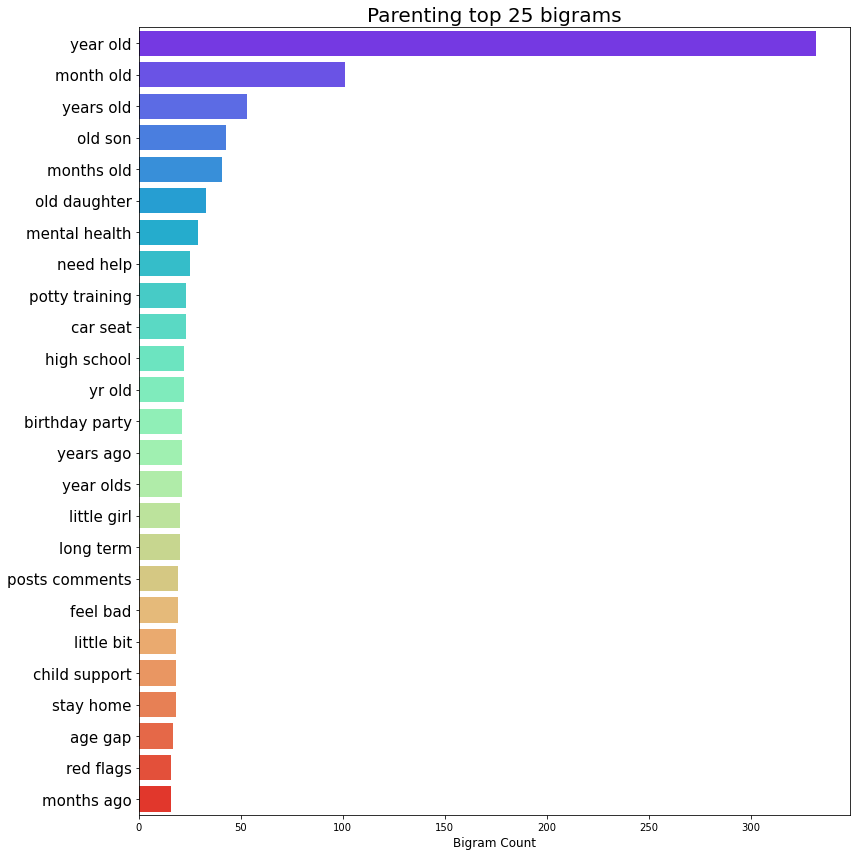

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 bigrams',fontsize=20)
plt.xlabel('Bigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

25 top trigrams

In [45]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(3, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [46]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['11 month old', '11 year old', '12 month old', '12 year old', '13 year old', '14 month old', '15 month old', '15 year old', '16 year old', '18 month old', '18 year old', '19 year old', '2fparenting moderators rely', '2fr 2fparenting moderators', 'adoptive parents people', 'advice greatly appreciated', 'appointed guardians considered', 'auto moderation manually', 'automatically auto moderation', 'better moderate content', 'bio parents step', 'child life feel', 'comment violating rule', 'comments feel contribute', 'comments meet parenting', 'community content automatically', 'community help illuminate', 'considered parents simply', 'content automatically auto', 'content longer contributed', 'contribute spirit community', 'contributed original topic', 'death suicide self', 'direct result rule', 'easter egg hunt', 'feel contribute spirit', 'feel harsh need', 'guardian bio parents', 'half year old', 'help illuminate comments', 'help year old', 'illuminate comments meet', 'kids eat color', 

In [47]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

year old son                       35
year old daughter                  21
18 year old                        11
13 year old                        10
14 month old                        9
16 year old                         9
message 2fr 2fparenting             8
moderators rely community           8
moderator direct result             8
moderation reach modmail            8
moderation manually moderator       8
longer contributed original         8
meet parenting standards            8
month old baby                      8
larger sweep content                8
illuminate comments meet            8
help illuminate comments            8
modmail message 2fr                 8
reach modmail message               8
parenting standards report          8
questions moderation reach          8
direct result rule                  8
rely community help                 8
report comments feel                8
result rule violation               8
rule violation simply               8
simply large

In [48]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,year old son,year old daughter,18 year old,13 year old,14 month old,16 year old,message 2fr 2fparenting,moderators rely community,moderator direct result,moderation reach modmail,...,illuminate comments meet,help illuminate comments,modmail message 2fr,reach modmail message,parenting standards report,questions moderation reach,direct result rule,rely community help,report comments feel,result rule violation
Count,35,21,11,10,9,9,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


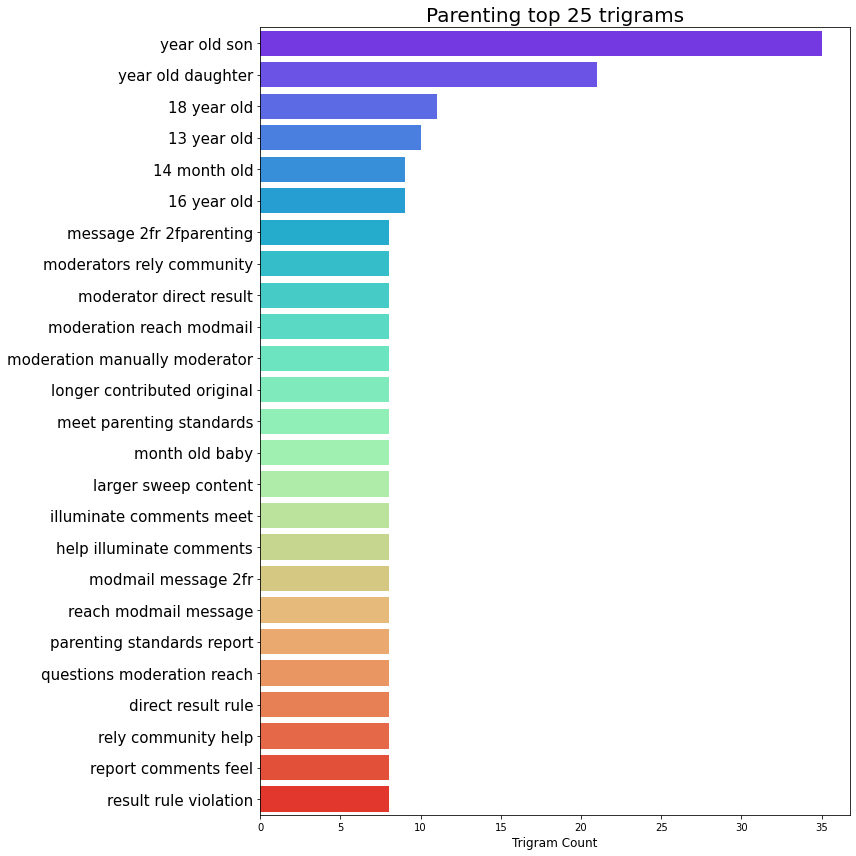

In [49]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Parenting top 25 trigrams',fontsize=20)
plt.xlabel('Trigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

Sentimenment analysis

In [32]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [33]:
df['sentiment'] = df['all_text'].apply(detect_sentiment)

(array([   5.,    6.,   37.,   57.,  347., 1092.,  315.,   91.,   25.,
          25.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

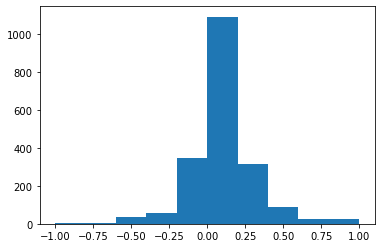

In [34]:
plt.hist(df['sentiment'])

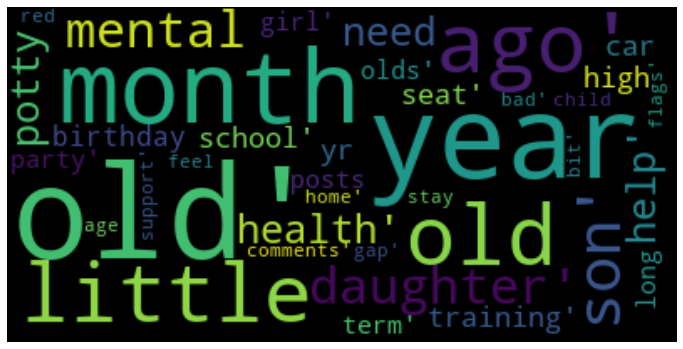

In [37]:
# Start with one review:
from wordcloud import WordCloud

text = " 'year old', 'month old', 'years old', 'old son', 'months old', 'old daughter', 'mental health', 'need help', 'potty training','car seat', 'high school', 'yr old', 'birthday party', 'years ago','year olds', 'little girl', 'long term', 'posts comments', 'feel bad','little bit', 'child support', 'stay home', 'age gap', 'red flags','months ago' "
#print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TF_IDF VECTORIZER

In [176]:


tvec = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 100, 
                     ngram_range = (1, 3))

tf_words = tvec.fit_transform(vector_input_combine)

tf_words = tf_words.toarray()

word_matrix = pd.DataFrame(tf_words, columns=tvec.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

diabetes       352.258907
insulin        303.720387
sugar          254.274539
blood          240.930213
type           191.342632
blood sugar    158.472930
low            158.093349
diabetic       149.893920
glucose        142.768092
day            136.910329
help           134.883297
need           133.836027
high           132.868335
people         130.917237
doctor         126.603717
work           125.839382
feel           125.456237
eat            121.559407
use            117.588692
diagnosed      116.382890
years          115.009114
carbs          113.593682
dexcom         111.830897
a1c            107.752790
want           106.236947
make           103.014685
sensor         102.009617
libre          100.793952
eating          96.571730
test            96.039871
days            93.265916
right           92.835338
thank           91.451867
long            91.349879
lot             88.347877
pump            88.259064
normal          84.126083
bad             80.414853
months      

### Top 25 Common Bigrams

In [177]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
cv_bigrams.fit(df['all_text'])

# bigrams_cv = cv_bigrams.transform(df['selftext'])
bigrams_cv = cv_bigrams.transform(df['all_text'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(25)

top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(25), columns = ['Count'])
top_biwords

,Count
blood sugar,763
type diabetes,241
blood glucose,143
sugar levels,104
blood sugars,101
freestyle libre,98
insulin resistance,98
diagnosed type,94
years ago,90
low carb,84


### Top 25 Common Trigrams

In [178]:
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)
cv_trigrams.fit(df['all_text'])

trigrams_cv = cv_trigrams.transform(df['all_text'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names())

top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(25), columns = ['Count'])
top_triwords

,Count
blood sugar levels,75
low blood sugar,43
high blood sugar,41
lower blood sugar,32
diagnosed type diabetes,30
fasting blood sugar,29
blood sugar high,24
blood glucose levels,23
blood sugar level,22
check blood sugar,18
